In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

888397 ['8918679055467300898', '9604739868383265989', '14346667865489288744']
Max digit len: 20
Digits per position: {0: [0, 7700, 0, 0, 0, 0, 0, 0, 0, 0], 1: [1523, 1337, 2170, 3238, 4180, 5235, 6077, 7082, 7922, 8933], 2: [1553, 12272, 3032, 3653, 4484, 4945, 5750, 6575, 7384, 8034], 3: [3606, 14839, 5745, 7464, 9301, 11022, 12728, 14496, 16527, 18192], 4: [5662, 17932, 9275, 11900, 14542, 17278, 19338, 22144, 24672, 27057], 5: [7628, 21455, 12838, 16201, 19628, 22652, 26637, 29564, 32863, 36427], 6: [9913, 25059, 16496, 20574, 24748, 29057, 32980, 37153, 41017, 45093], 7: [12186, 28804, 20156, 25127, 30261, 34826, 39592, 44461, 49015, 53716], 8: [14421, 32827, 23950, 29669, 35123, 40840, 46348, 51988, 57360, 62165], 9: [17018, 37022, 27887, 34011, 40397, 46811, 52654, 59286, 64847, 71245], 10: [19282, 41359, 31991, 38653, 45554, 52528, 59068, 66118, 73062, 80275], 11: [22129, 46119, 35978, 43380, 50901, 58132, 65813, 73137, 80245, 88817], 12: [24929, 51460, 39926, 48373, 55981, 6409

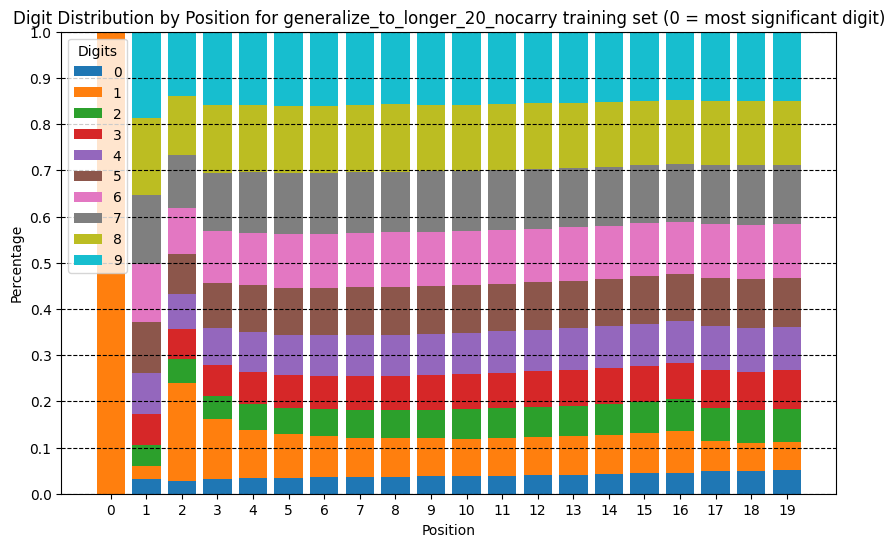

In [3]:
# check distribution of digits in answer generalize-to-longer
# datapath = "../data/addition/exp_13/train_add_1-19_except18_1M.txt"
datapath = (
    "../data/addition/generalize_to_longer_20_nocarry/train_add_1-19_except18_1M.txt"
)
dataset_name = "generalize_to_longer_20_nocarry"

with open(datapath, "r") as f:
    answers = list(map(lambda l: l.split("=")[1].strip(), f.readlines()))


print(len(answers), answers[-3:])

# take digits by position
max_digit_len = max(map(len, answers))
print("Max digit len:", max_digit_len)

digits_per_pos = {i: [0] * 10 for i in range(max_digit_len)}

for ans in answers:
    for i, digit in enumerate(ans[::-1]):
        digits_per_pos[max_digit_len - i - 1][int(digit)] += 1

print("Digits per position:", digits_per_pos)

# normalize counts
for pos, counts in digits_per_pos.items():
    total = sum(counts)
    digits_per_pos[pos] = [c / total for c in counts]

print("Digits per position (normalized):", digits_per_pos)

positions = np.arange(max_digit_len)  # Positions for each stack
bottom = np.zeros(max_digit_len)  # Starting point for the first digit

plt.figure(figsize=(10, 6))

# Plot each digit's percentage one by one
for digit in range(10):
    values = [digits_per_pos[pos][digit] for pos in range(max_digit_len)]
    plt.bar(positions, values, bottom=bottom, label=digit)
    bottom += values  # Update the bottom for the next stack

plt.xlabel("Position")
plt.ylabel("Percentage")
plt.title(
    f"Digit Distribution by Position for {dataset_name} training set (0 = most significant digit)"
)
plt.xticks(positions)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis="y", linestyle="--", which="both", color="black")
plt.legend(title="Digits")
plt.savefig(f"../plots/ans_digit_distribution_{dataset_name}_train.png")
plt.show()